In [1]:
# Load necessary libraries
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# CDC Nutrition, Physical Activity, and Obesity - Legislation | Socrata API Foundry – This dataset has
# 2001-2017 data which includes data for state regulation on nutrition, physical activity, and obesity.
# Save CDC website into 'url' variable 
url = 'https://chronicdata.cdc.gov/resource/nxst-x9p4.json'

In [3]:
# read the CDC website json data using request.get() and save in 'response' variable 
response = requests.get(url)
# Load json data in "json_data" varaible
json_data = json.loads(response.text)

In [4]:
# create a list with keys that are expected from the json data
list_keys=['year', 'quarter', 'locationabbr', 'locationdesc', 'topicdesc', 'policytopic', 'datasource', 'setting', 
           'title', 'status', 'citation', 'statusaltvalue', 'datatype', 'comments', 'displayorder', 'policytypeid',
           'healthtopicid', 'policytopicid', 'settingid', 'provisionid', ':@computed_region_bxsw_vy29',
           ':@computed_region_he4y_prf8', 'geolocation']

In [5]:
# create empty list name 'table_data'
table_data = []

# loop through the list of keys and save json data for each key
# each iteraton will save each record into 'row_data' list and will be appended to the table_data list
for i in range(len(json_data)):
    # create empty list "row_data"
    row_data = []
    # Loop through list_keys and extract values for the keys from json_data
    for k in list_keys:
        if k in list(json_data[i].keys()):
            # 'geolocation' is only variable in list_keys which has two sub keys 'latitude' and 'longitude'
            # Adding 'geolocation' sub-keys 'latitude' and 'longitude' and saving combined value in geolocation 
            if k == 'geolocation':
                txt = '(' + json_data[i][k]['latitude'] + ', ' + json_data[i][k]['longitude'] + ')'
                row_data.append(txt)
            else:
                row_data.append(json_data[i][k])
    
    # each record from row_data list is saved to 'table_data' list after each itaration 
    table_data.append(row_data)

In [6]:
# create dataframe 'cdc_df' using 'table_data' and 'list_keys' as column names
cdc_df = pd.DataFrame(table_data, columns=list_keys)

In [7]:
# check for first few rows of the dataframe using head()
cdc_df.head()

,year,quarter,locationabbr,locationdesc,topicdesc,policytopic,datasource,setting,title,status,...,comments,displayorder,policytypeid,healthtopicid,policytopicid,settingid,provisionid,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,geolocation
0,2010,1,NY,New York,Obesity,Incentives,DNPAO,Community,State Fiscal Plan,Dead,...,(Abstract - Enacts into law major components o...,38,LEG,002OB,029INC,002COM,1641,47,2092,"(42.827001032, -75.543970427)"
1,2011,1,WV,West Virginia,Nutrition,Appropriations,DNPAO,Community,Sales Tax on Food,Dead,...,(Abstract - Eliminates the sales tax on food e...,2,LEG,001NUT,002APP,002COM,4781,42,2749,"(38.665510202, -80.712640135)"
2,2011,1,MA,Massachusetts,Physical Activity,Built Environment and Street-Scale Design,DNPAO,Community,Pedestrian Safety,Dead,...,"(Abstract - Relates to pedestrian safety. ),...",68,LEG,003PA,049BED,002COM,4090,25,1919,"(42.27687047, -72.082690675)"
3,2010,1,NC,North Carolina,Obesity,Menu Labeling,DNPAO,Community,Governors Budget,Dead,...,"(Abstract - Concerns governors budget. ), (Bil...",41,LEG,002OB,032MNL,002COM,2908,37,2390,"(35.466220975, -79.159250463)"
4,2011,1,FL,Florida,Physical Activity,"Parks, Recreation and Trails",DNPAO,School/After School,Chronic Diseases<br>,Dead,...,"(Abstract - ""Creates the chronic disease preve...",59,LEG,003PA,034PRT,004SAS,5615,30,1112,"(28.932040377, -81.928960539)"


In [8]:
# Check the # of rows and columns of the dataframe by using shape function
cdc_df.shape

(1000, 23)

In [9]:
# Replace Header 'locationabbr' to 'StateCode', 'locationdesc' to 'State' in the dataframe 
cdc_df.rename(columns= {"locationabbr": "StateCode", "locationdesc": "State"}, inplace=True)
cdc_df.columns

Index(['year', 'quarter', 'StateCode', 'State', 'topicdesc', 'policytopic',
       'datasource', 'setting', 'title', 'status', 'citation',
       'statusaltvalue', 'datatype', 'comments', 'displayorder',
       'policytypeid', 'healthtopicid', 'policytopicid', 'settingid',
       'provisionid', ':@computed_region_bxsw_vy29',
       ':@computed_region_he4y_prf8', 'geolocation'],
      dtype='object')

In [10]:
# find duplicates for 'year', 'StateCode' and 'State' in dataframe
# All three variables have duplicate values. The nature of my data set allows to have duplicate values in these columns. 
# Confirmed that all selected variables have duplicate values.

print("Year is duplicated - {}".format(any(cdc_df.year.duplicated())))
print("State Code is duplicated - {}".format(any(cdc_df.StateCode.duplicated())))
print("State is duplicated - {}".format(any(cdc_df.State.duplicated())))

Year is duplicated - True
State Code is duplicated - True
State is duplicated - True


In [11]:
# Check data types of the variables in cdc_df
cdc_df.dtypes

year                           object
quarter                        object
StateCode                      object
State                          object
topicdesc                      object
policytopic                    object
datasource                     object
setting                        object
title                          object
status                         object
citation                       object
statusaltvalue                 object
datatype                       object
comments                       object
displayorder                   object
policytypeid                   object
healthtopicid                  object
policytopicid                  object
settingid                      object
provisionid                    object
:@computed_region_bxsw_vy29    object
:@computed_region_he4y_prf8    object
geolocation                    object
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x1347c124fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1347c13d6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1347c124c40>],
 'medians': [<matplotlib.lines.Line2D at 0x1347c13dd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1347c1470a0>],
 'means': []}

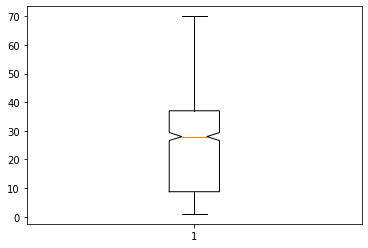

In [12]:
# plot the box plot to view outliers for 'displayorder'.
plt.boxplot(cdc_df.displayorder.astype('int'), notch=True)

In [13]:
# no need to remove any rows from data frame as there are no outliers in 'displayorder' column

In [14]:
# checking null values in all columns and providing counts
cdc_df.isnull().sum()

year                           0
quarter                        0
StateCode                      0
State                          0
topicdesc                      0
policytopic                    0
datasource                     0
setting                        0
title                          0
status                         0
citation                       0
statusaltvalue                 0
datatype                       0
comments                       0
displayorder                   0
policytypeid                   0
healthtopicid                  0
policytopicid                  0
settingid                      0
provisionid                    0
:@computed_region_bxsw_vy29    0
:@computed_region_he4y_prf8    0
geolocation                    0
dtype: int64

In [15]:
# no null values found

In [16]:
# Fix casing or inconsistent values
# following four columns need to be deleted from dataframe 
del cdc_df['datasource']
del cdc_df['datatype']
del cdc_df[':@computed_region_bxsw_vy29']
del cdc_df[':@computed_region_he4y_prf8']

In [17]:
# Format data into a more readable format
# data is in readable format and no need to change the format 

In [18]:
# Check the # of rows and columns of the dataframe by using shape function after all cleansing is completed
cdc_df.shape

(1000, 19)

In [19]:
cdc_df.to_csv('cdc.csv', index=False)